In [8]:
path = './'

In [9]:
import numpy as np
from random import gauss

In [10]:
a = [gauss(1.5, 2) for i in range(1000000)]

In [11]:
import pickle

In [12]:
pkl_file = open(path + 'data.pkl', 'wb')

In [13]:
%time pickle.dump(a, pkl_file)

Wall time: 78.2 ms


In [14]:
pkl_file

<_io.BufferedWriter name='./data.pkl'>

In [15]:
pkl_file.close()

In [16]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [17]:
%time b = pickle.load(pkl_file)

Wall time: 104 ms


In [18]:
b[:5]

[3.3000844231770032,
 0.6761646502137353,
 1.141941338996559,
 1.1666815533700552,
 5.043819434141566]

In [19]:
a[:5]

[3.3000844231770032,
 0.6761646502137353,
 1.141941338996559,
 1.1666815533700552,
 5.043819434141566]

In [20]:
np.allclose(np.array(a), np.array(b))

True

In [21]:
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing

In [22]:
%time pickle.dump(np.array(a), pkl_file)

Wall time: 55.1 ms


In [23]:
%time pickle.dump(np.array(a) ** 2, pkl_file)

Wall time: 68.7 ms


In [24]:
pkl_file.close()

In [26]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [27]:
x = pickle.load(pkl_file)
x

array([ 3.30008442,  0.67616465,  1.14194134, ...,  3.20724879,
        1.77880733,  2.32048492])

In [28]:
y = pickle.load(pkl_file)
y

array([ 10.8905572 ,   0.45719863,   1.30403002, ...,  10.28644479,
         3.16415553,   5.38465025])

In [29]:
pkl_file.close()

In [30]:
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing
pickle.dump({'x' : x, 'y' : y}, pkl_file)
pkl_file.close()

In [31]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for writing
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 3.30008442  0.67616465  1.14194134  1.16668155]
y [ 10.8905572    0.45719863   1.30403002   1.36114585]


In [46]:
rows = 5000
a = np.random.standard_normal((rows, 5))  # dummy data

In [47]:
import pandas as pd
t = pd.date_range(start='2014/1/1', periods=rows, freq='H')

In [48]:
csv_file = open(path + 'data.csv', 'w')  # open file for writing

In [49]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [50]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [51]:
csv_file = open(path + 'data.csv', 'r')  # open file for reading

In [52]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,1.852503,1.037964,-0.068614,-0.592671,0.627895
2014-01-01 01:00:00,0.829533,1.794323,0.969349,0.709101,-0.817090
2014-01-01 02:00:00,-1.110100,0.224978,-0.334912,1.819250,0.990636
2014-01-01 03:00:00,0.277896,0.269311,-0.426027,-0.709160,2.012830


In [53]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print(line, end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,1.852503,1.037964,-0.068614,-0.592671,0.627895
2014-01-01 01:00:00,0.829533,1.794323,0.969349,0.709101,-0.817090
2014-01-01 02:00:00,-1.110100,0.224978,-0.334912,1.819250,0.990636
2014-01-01 03:00:00,0.277896,0.269311,-0.426027,-0.709160,2.012830


In [54]:
csv_file.close()

In [55]:
import sqlite3 as sq3

In [56]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [57]:
con = sq3.connect(path + 'numbs.db')

In [58]:
con.execute(query)

In [59]:
con.commit()

In [60]:
import datetime as dt

In [61]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
            (dt.datetime.now(), 0.12, 7.3))

In [62]:
data = np.random.standard_normal((10000, 2)).round(5)

In [63]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (dt.datetime.now(), row[0], row[1]))
con.commit()

In [64]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[('2018-03-07 18:22:36.723639', 0.12, 7.3),
 ('2018-03-07 18:23:42.325956', -0.50439, 0.49781),
 ('2018-03-07 18:23:42.326457', -0.12286, 1.19807),
 ('2018-03-07 18:23:42.326457', -0.13587, -0.5166),
 ('2018-03-07 18:23:42.326457', 0.45619, 1.3276),
 ('2018-03-07 18:23:42.326457', -0.72096, -0.37107),
 ('2018-03-07 18:23:42.326457', -0.55868, -2.31417),
 ('2018-03-07 18:23:42.326457', 0.95303, 0.20046),
 ('2018-03-07 18:23:42.326457', -0.16284, -0.80302),
 ('2018-03-07 18:23:42.326457', 0.31453, 0.10801)]

In [65]:
pointer = con.execute('SELECT * FROM numbs')

In [66]:
for i in range(3):
    print(pointer.fetchone())

('2018-03-07 18:22:36.723639', 0.12, 7.3)
('2018-03-07 18:23:42.325956', -0.50439, 0.49781)
('2018-03-07 18:23:42.326457', -0.12286, 1.19807)


In [67]:
con.close()

In [68]:
import numpy as np

In [69]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00',
                  dtype='datetime64[m]')  # minute intervals
len(dtimes)

3681360

In [70]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [72]:
data['Date'] = dtimes

In [73]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [74]:
%time np.save(path + 'array', data)  # suffix .npy is added

Wall time: 635 ms


In [75]:
%time np.load(path + 'array.npy')

Wall time: 770 ms


array([('2015-01-01T10:00',  0.14052001,  0.31132999),
       ('2015-01-01T10:01',  0.8197    , -1.57142997),
       ('2015-01-01T10:02', -0.78057998, -1.38082004), ...,
       ('2021-12-31T21:57',  0.63696003, -0.37204   ),
       ('2021-12-31T21:58', -0.48392999,  0.99997997),
       ('2021-12-31T21:59',  0.53893   , -0.95431   )],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [76]:
data = np.random.standard_normal((10000, 6000))

In [77]:
%time np.save(path + 'array', data) 

Wall time: 5.11 s


In [81]:
data = 0.0

In [82]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((1000000, 5)).round(5)

In [83]:
filename = path + 'numbs'

In [84]:
import sqlite3 as sq3

In [85]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'

In [86]:
con = sq3.Connection(filename + '.db')

In [87]:
con.execute(query)

In [88]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

Wall time: 12.9 s


In [89]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print(temp[:2])
temp = 0.0

[(-0.3715, 0.12605, 0.91891, -0.32293, 1.01128), (1.16292, -1.13239, -0.84853, 1.05591, -0.15056)]
Wall time: 2.6 s


In [90]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

Wall time: 1.35 s


(-4.5, 0.5)

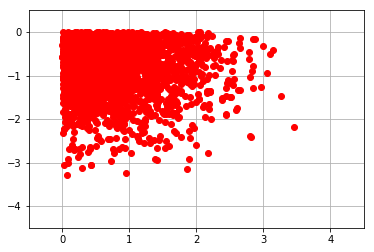

In [91]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)

In [92]:
%time data = pd.read_sql('SELECT * FROM numbers', con)

Wall time: 3.26 s


In [93]:
data.head()

,No1,No2,No3,No4,No5
0,-0.37150,0.12605,0.91891,-0.32293,1.01128
1,1.16292,-1.13239,-0.84853,1.05591,-0.15056
2,-1.00389,1.82309,1.27093,1.01375,-0.10171
3,-0.56322,1.27282,0.44671,-0.22788,1.84662
4,0.78738,1.08040,1.51551,-1.31695,-0.78555


In [94]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

Wall time: 101 ms


,No1,No2,No3,No4,No5
1,1.16292,-1.13239,-0.84853,1.05591,-0.15056
12,0.44876,-2.93676,-1.13349,0.62417,-1.75030
13,0.30803,-0.13151,-1.37960,1.76597,0.02667
18,0.20359,-0.24471,-0.89971,-0.42160,-0.63518
19,0.48140,-1.83825,-0.58814,-1.53181,-1.93202


In [95]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5))
                     & ((data['No2'] < -1) | (data['No2'] > 1))]

Wall time: 87.7 ms


(-5.001125, 4.6961449999999996, -5.1417199999999994, 5.3975999999999997)

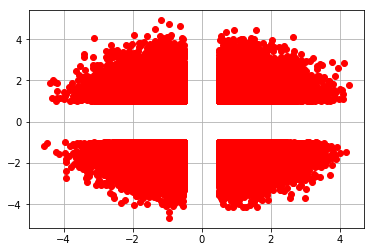

In [96]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')

In [97]:
h5s = pd.HDFStore(filename + '.h5s', 'w')

In [98]:
%time h5s['data'] = data

Wall time: 432 ms


In [99]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./numbs.h5s
/data            frame        (shape->[1000000,5])

In [100]:
h5s.close()

In [101]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

Wall time: 125 ms


In [102]:
np.allclose(np.array(temp), np.array(data))

True

In [103]:
temp = 0.0

In [104]:
%time data.to_csv(filename + '.csv')

Wall time: 11.6 s


Wall time: 2.01 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B407670>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x270DBB70>]], dtype=object)

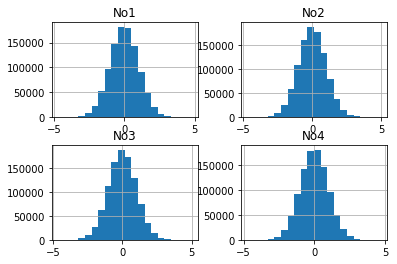

In [105]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20);

In [106]:
%time data[:100000].to_excel(filename + '.xlsx')

Wall time: 18.5 s


Wall time: 11.2 s


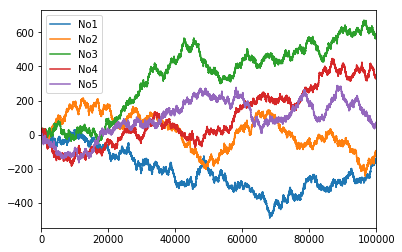

In [107]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()

In [108]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w') 

In [110]:
rows = 2000000

In [111]:
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
    }

In [112]:
filters = tb.Filters(complevel=0)  # no compression
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [113]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [114]:
pointer = tab.row

In [115]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

In [116]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1] 
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1] 
    pointer.append()
      # this appends the data and
      # moves the pointer one row forward
tab.flush()

Wall time: 11.1 s


In [117]:
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [118]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

In [119]:
sarray

array([(b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.),
       ..., (b'', 0, 0,  0.,  0.), (b'', 0, 0,  0.,  0.),
       (b'', 0, 0,  0.,  0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [120]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

Wall time: 185 ms


In [121]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

Wall time: 106 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [122]:
h5

File(filename=./tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [123]:
h5.remove_node('/', 'ints_floats_from_array')

In [124]:
tab[:3]

array([(b'2018-03-07 18:53:46.696911', 4409, 2729,  0.18573, -1.31332),
       (b'2018-03-07 18:53:46.696911', 7768, 3094,  0.47508,  0.35469),
       (b'2018-03-07 18:53:46.696911', 4349, 9002,  0.57915, -1.03993)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [125]:
tab[:4]['No4']

array([-1.31332,  0.35469, -1.03993, -0.34716])

In [126]:
%time np.sum(tab[:]['No3'])

Wall time: 203 ms


-459.3761099999997

In [127]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 172 ms


133319921.08250217

2000000
Wall time: 600 ms


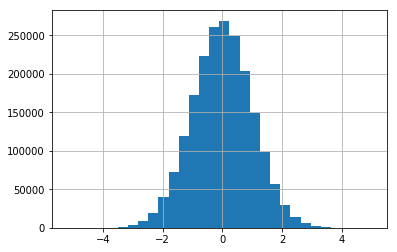

In [128]:
%%time
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print(len(tab[:]['No3']))

In [129]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
        tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                 & ((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 525 ms


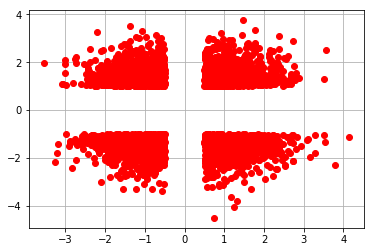

In [130]:
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)

In [131]:
%%time
values = tab.cols.No3[:]
print("Max %18.3f" % values.max())
print("Ave %18.3f" % values.mean())
print("Min %18.3f" % values.min())
print("Std %18.3f" % values.std())

Max              5.000
Ave             -0.000
Min             -5.199
Std              1.001
Wall time: 129 ms


In [132]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('((No1 > 9800) | (No1 < 200)) \
                    & ((No2 > 4500) & (No2 < 5500))')]
for res in results[:4]:
    print(res)

(9850, 4561)
(26, 5484)
(9889, 5088)
(100, 5365)
Wall time: 148 ms


In [133]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('(No1 == 1234) & (No2 > 9776)')]
for res in results:
    print(res)

(1234, 9920)
(1234, 9835)
(1234, 9819)
(1234, 9778)
Wall time: 118 ms


In [134]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w') 

In [135]:
filters = tb.Filters(complevel=4, complib='blosc')

In [136]:
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [137]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
             tabc.where('((No3 < -0.5) | (No3 > 0.5)) \
                       & ((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 531 ms


In [138]:
%time arr_non = tab.read()

Wall time: 121 ms


In [139]:
%time arr_com = tabc.read()

Wall time: 112 ms
